# Make csvs with the combined datasets used in the paper "Improving Generalization of Norwegian ASR with Limited Linguistic Resources"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re

In [4]:
cols = [
    "speaker_id",
    "gender",
    "utterance_id",
    "language",
    "raw_text",
    "full_audio_file",
    "original_data_split",
    "region",
    "duration",
    "start",
    "end",
    "utterance_audio_file",
    "standardized_text",
]

In [8]:
fnpattern = re.compile(r"(rundkast|npsc)_\d+_([a-z]+)\.csv")
dfs = []
for f in Path("raw_datasets").glob("*.csv"):
    if fnpattern.match(f.name):
        print(f.name)
        ds, split = fnpattern.match(str(f.name)).groups()
        df = pd.read_csv(f, names=cols)
        df["dataset"] = ds
        df["split"] = split
        dfs.append(df)
total_df = pd.concat(dfs)

rundkast_20221102_test.csv
rundkast_20221102_train.csv
npsc_20230105_eval.csv
npsc_20230105_train.csv
rundkast_20221102_eval.csv
npsc_20230105_test.csv


In [9]:
rundkast_train = total_df.query("dataset == 'rundkast' & language == 'nb-NO' & split == 'train' & duration > 1 & duration < 15")
rundkast_eval = total_df.query("dataset == 'rundkast' & language == 'nb-NO' & split == 'eval' & duration > 1 & duration < 15")
rundkast_test = total_df.query("dataset == 'rundkast' & language == 'nb-NO' & split == 'test' & duration > 1 & duration < 15")
npsc_train = total_df.query("dataset == 'npsc' & language == 'nb-NO' & split == 'train' & duration > 1 & duration < 15 & utterance_id != 'npsc_62309'")
npsc_eval = total_df.query("dataset == 'npsc' & language == 'nb-NO' & split == 'eval' & duration > 1 & duration < 15")
npsc_test = total_df.query("dataset == 'npsc' & language == 'nb-NO' & split == 'test' & duration > 1 & duration < 15")

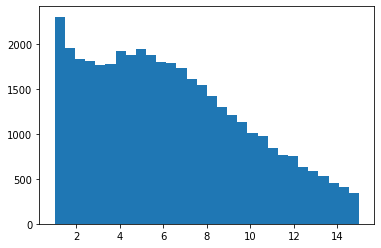

In [10]:
plt.hist(npsc_train.duration, bins=30)
plt.show()

In [11]:
print(f"NPSC train mean duration: {npsc_train.duration.mean()}")
print(f"Rundkast train mean duration: {rundkast_train.duration.mean()}")

NPSC train mean duration: 6.3301089532093595
Rundkast train mean duration: 3.2661432262039463


In [12]:
relative_increase = ((npsc_train.duration.mean()-rundkast_train.duration.mean())/rundkast_train.duration.mean())
print(f"Relative increase in segment duration from Rundkast to NPSC: {relative_increase}")

Relative increase in segment duration from Rundkast to NPSC: 0.9380990099954948


In [13]:
duration_npsc_train_s = npsc_train.duration.sum()
duration_rundkast_train_s = rundkast_train.duration.sum()
print(f"Total duration in seconds NPSC train: {duration_npsc_train_s}")
print(f"Total duration in seconds Rundkast train: {duration_rundkast_train_s}")

Total duration in seconds NPSC train: 253254.99900000004
Total duration in seconds Rundkast train: 157006.7710268499


In [14]:
npsc_sample_train = npsc_train.sample(frac=0.5, random_state=42)
npsc_sample_eval = npsc_eval.sample(frac=0.5, random_state=42)
npsc_sample_test = npsc_test.sample(frac=0.5, random_state=42)

In [16]:
length_rk_sample_train = int((npsc_train.shape[0]/2)*(1+relative_increase))
length_rk_sample_eval = int((npsc_eval.shape[0]/2)*(1+relative_increase))
length_rk_sample_test = int((npsc_test.shape[0]/2)*(1+relative_increase))

In [17]:
rundkast_sample_train = rundkast_train.sample(n=length_rk_sample_train, random_state=42)
rundkast_sample_eval = rundkast_eval.sample(n=length_rk_sample_eval, random_state=42)
rundkast_sample_test = rundkast_test.sample(n=length_rk_sample_test, random_state=42)

In [18]:
print(npsc_sample_train.duration.sum())
print(rundkast_sample_train.duration.sum())

127010.231
126526.0956339956


In [19]:
print(npsc_sample_eval.duration.sum())
print(rundkast_sample_eval.duration.sum())

17229.486
17533.461


In [20]:
print(npsc_sample_test.duration.sum())
print(rundkast_sample_test.duration.sum())

16537.754
16583.565000000002


In [21]:
# Difference in seconds between npsc train and combined dataset train
(npsc_sample_train.duration.sum() + rundkast_sample_train.duration.sum() - duration_npsc_train_s)/60

4.688793899926046

In [22]:
npsc_rundkast_sample_nb_train = pd.concat([npsc_sample_train, rundkast_sample_train]).sample(frac=1)
npsc_rundkast_sample_nb_test = pd.concat([npsc_sample_test, rundkast_sample_test]).sample(frac=1)
npsc_rundkast_sample_nb_eval = pd.concat([npsc_sample_eval, rundkast_sample_eval]).sample(frac=1)

In [23]:
npsc_rundkast_sample_nb_train.to_csv("combined_datasets/npsc_rundkast_sample_nb_train.csv", index=False)
npsc_rundkast_sample_nb_test.to_csv("combined_datasets/npsc_rundkast_sample_nb_test.csv", index=False)
npsc_rundkast_sample_nb_eval.to_csv("combined_datasets/npsc_rundkast_sample_nb_eval.csv", index=False)

In [24]:
npsc_rundkast_total_nb_train = pd.concat([npsc_train, rundkast_train]).sample(frac=1)
npsc_rundkast_total_nb_test = pd.concat([npsc_test, rundkast_test]).sample(frac=1)
npsc_rundkast_total_nb_eval = pd.concat([npsc_eval, rundkast_eval]).sample(frac=1)

In [25]:
npsc_rundkast_total_nb_train.to_csv("combined_datasets/npsc_rundkast_total_nb_train.csv", index=False)
npsc_rundkast_total_nb_test.to_csv("combined_datasets/npsc_rundkast_total_nb_test.csv", index=False)
npsc_rundkast_total_nb_eval.to_csv("combined_datasets/npsc_rundkast_total_nb_eval.csv", index=False)